In [1]:
import matplotlib.pyplot as plt
from circuits_benchmark.utils.get_cases import get_cases
from circuits_benchmark.utils.iit import make_iit_hl_model, make_ll_cfg
from circuits_benchmark.transformers.hooked_tracr_transformer import HookedTracrTransformer
from circuits_benchmark.utils.iit.wandb_loader import load_model_from_wandb
import torch

case = 3
case = get_cases(indices=[str(case)])[0]


tracr_model = case.get_tl_model()
hl_model = make_iit_hl_model(tracr_model)
output_dir = "results/rough_dump/"
def load_iit_model(weight):
    ll_cfg = make_ll_cfg(hl_model)
    ll_model = HookedTracrTransformer(
        ll_cfg,
        hl_model.tracr_input_encoder,
        hl_model.tracr_output_encoder,
        hl_model.residual_stream_labels,
        remove_extra_tensor_cloning=True,
    )
    load_model_from_wandb(case.get_index(), weight, output_dir)

    ll_model.load_state_dict(torch.load(output_dir + f"ll_models/{case.get_index()}/ll_model_{weight}.pth"))
    return ll_model

ll_model_100 = load_iit_model("100")
ll_model_510 = load_iit_model("510")

Moving model to device:  cpu
Moving model to device:  cpu


In [2]:
# ll_model_100.blocks[0].attn.W_Q

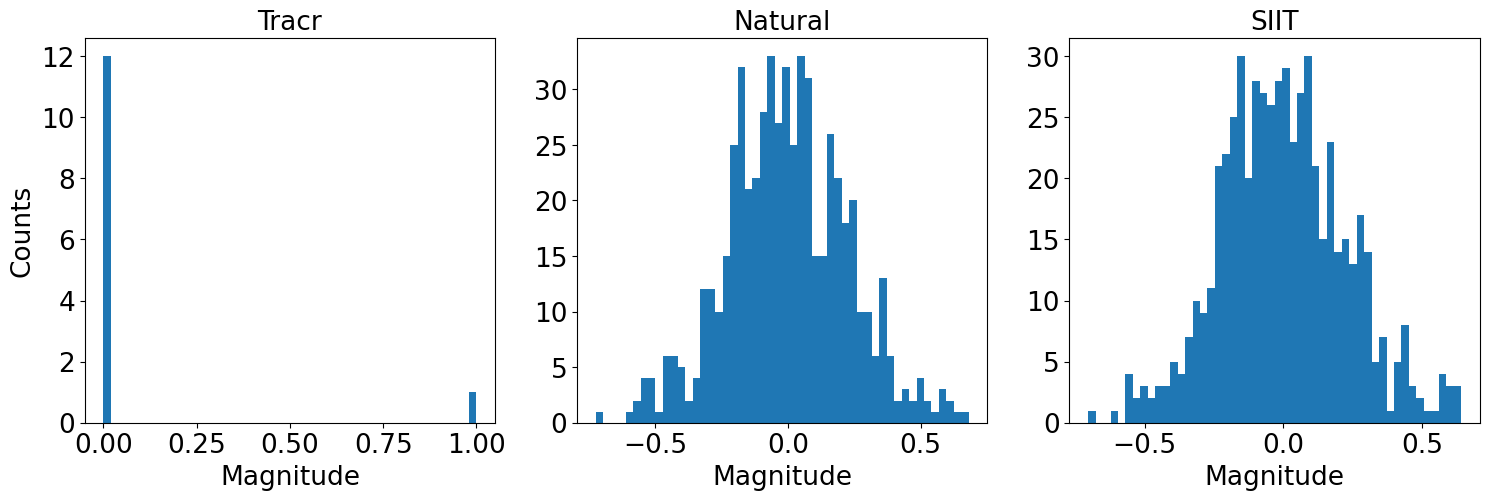

In [10]:
plt.rcParams.update({'font.size': 19})
plt.rcParams.update({'axes.labelsize': 19})
plt.rcParams.update({'axes.titlesize': 19})
plt.rcParams.update({'xtick.labelsize': 19})
plt.rcParams.update({'ytick.labelsize': 19})
def plot_attention_head(tracr_model, ll_model_100, ll_model_510, head):
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))
    labels = ["Tracr", "Natural", "SIIT"]
    for i, model in enumerate([tracr_model, ll_model_100, ll_model_510]):
        # all_param_list = list(model.parameters())
        # # flatten all parameters
        # all_param_list = [p.flatten() for p in all_param_list]
        # all_param_list = torch.cat(all_param_list).detach().numpy()


        # all_param_list = model.blocks[0].attn.W_Q.flatten().detach().numpy()
        all_param_list = model.blocks[0].mlp.W_out.flatten().detach().numpy()


        # plot histogram
        axs[i].hist(all_param_list, bins=50)
        axs[i].set_title(labels[i])
        # set color of histogram
        axs[i].set_facecolor('white')

        # label all y axis as counts
        axs[0].set_ylabel("Counts")
        # label all x axis as values
        axs[i].set_xlabel("Magnitude")
    plt.savefig("plots/weight_plot.pdf", format="pdf", bbox_inches='tight')
    plt.show()

plot_attention_head(tracr_model, ll_model_100, ll_model_510, 0)
# set size
# plt.fig
